In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split

**[Mental Health Counseling Conversations](https://huggingface.co/datasets/Amod/mental_health_counseling_conversations)** Dataset is a collection of questions and answers sourced from two online counseling and therapy platforms. The questions cover a wide range of mental health topics, and the answers are provided by qualified psychologists.

In [30]:
# Load the data
data = pd.read_csv('amod-mental-health-counseling-conversations-data.csv')

In [31]:
data.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...


In [32]:
#split the data
train_data, test_data = train_test_split(data, test_size=0.03, random_state=42)

In [33]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# EDA on Evaluation Data

In [34]:
# Load the CSV file
test_df = pd.read_csv('test_data.csv')

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   106 non-null    object
 1   Response  106 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [40]:
# Utility function

#---------------------------------------------------------------
# Basic stats
#---------------------------------------------------------------
def basic_statistics (columns, data=test_df):
    """
    Return basic statistics like min, max and others
    """
    x = PrettyTable()
    header = ["stats"] + columns
    result = {'minimum':[], 'maximum':[], 'mean':[], 'median':[], '25th per':[],
              '50th per':[], '75th per':[], '90th per':[], '95th per':[], '99th per':[]}

    for col in columns:
        col_val = data[col].values
        # Getting stats for the column
        result['minimum'].append(np.round(col_val.min(),2))
        result['maximum'].append(np.round(col_val.max(),2))
        result['mean'].append(np.round(np.mean(col_val),2))
        result['median'].append(np.round(np.median(col_val),2))
        for p in [25, 50, 75, 90, 95, 99]:
            result[str(p)+"th per"].append(np.round(np.percentile(col_val, p),2))
    
    # Printing results in a table
    x.field_names = header
    for tup in result.items():
        x.add_row([tup[0]]+tup[1])
    print(x)



#---------------------------------------------------------------
# Plotting Series
#---------------------------------------------------------------
def plot_func(columns, xlabel, ylabel, title, data=test_df, header=["Context", "Response"]):
    """
    Plots pdf and boxplot on the given data
    """
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(18, 6))
    
    # Adding subplots
    pdf = fig.add_subplot(1,2,1)
    box = fig.add_subplot(1,2,2)
    
    # pdf/distplot
    pdf.set(title=title, xlabel=xlabel, ylabel=ylabel)
    for col in columns:
        sns.distplot(data[col].values, hist=True, rug=True, ax=pdf, label=col)
    pdf.legend()
    
    # boxplot
    box.set(title=title, ylabel=xlabel)
    sns.boxplot(data=data[columns], ax=box, orient='v')
    box.set_xticklabels(columns)
    
    plt.plot()

## Number of sentences in Text

Checking for number of sentences in Questions and Answers

+----------+-------------+--------------+
|  stats   | Context_len | Response_len |
+----------+-------------+--------------+
| minimum  |      1      |      1       |
| maximum  |      21     |      42      |
|   mean   |     4.36    |     8.94     |
|  median  |     4.0     |     7.0      |
| 25th per |     2.0     |     4.0      |
| 50th per |     4.0     |     7.0      |
| 75th per |     5.75    |     12.0     |
| 90th per |     7.0     |     17.5     |
| 95th per |    11.75    |    23.25     |
| 99th per |    15.95    |     30.0     |
+----------+-------------+--------------+


C:\Users\nayin\AppData\Local\Temp\ipykernel_20908\900710047.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].values, hist=True, rug=True, ax=pdf, label=col)
C:\Users\nayin\AppData\Local\Temp\ipykernel_20908\900710047.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].va

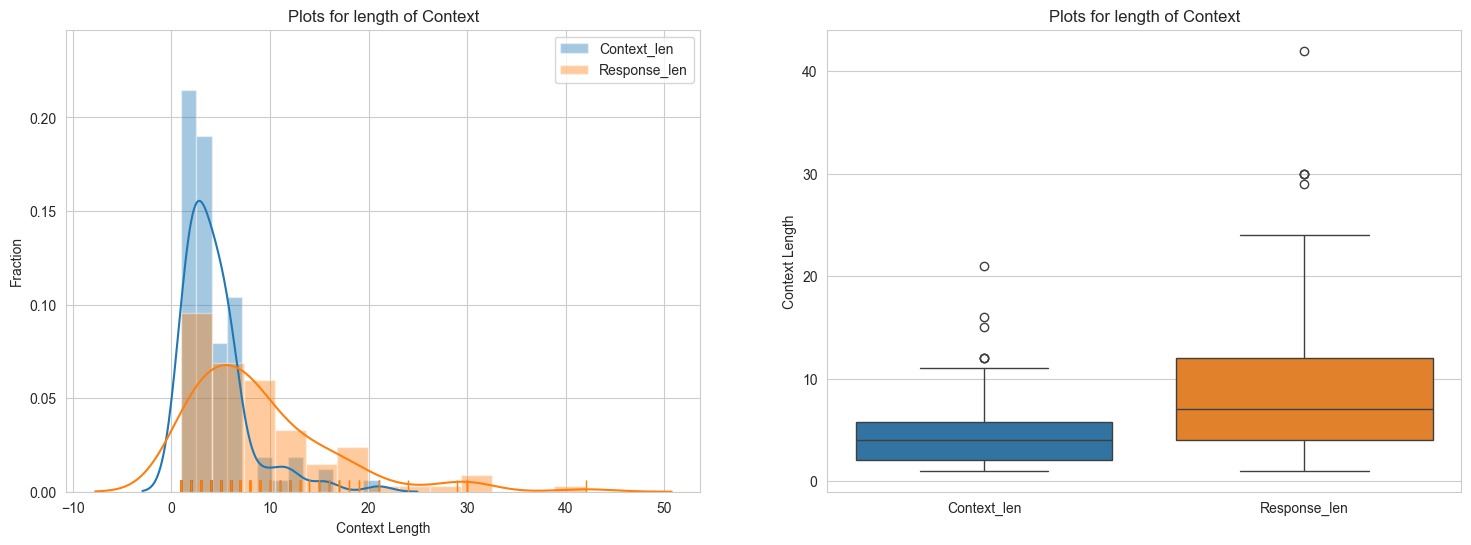

In [41]:
test_df['Context_len'] = test_df['Context'].astype('str').apply(lambda x: len(TextBlob(x).sentences))
test_df['Response_len'] = test_df['Response'].astype('str').apply(lambda x: len(TextBlob(x).sentences))

basic_statistics(['Context_len', 'Response_len'])
plot_func(['Context_len', 'Response_len'], 'Context Length', 'Fraction', 'Plots for length of Context')

Context:
1. No of sentences in context starts from 1 to 21.
2. Most text has less than 15 sentences. That is 99% percentile of rows has 5 or fewer sentences.

Response:
1. In response No of sentences start from 1 to 42.
2. Most of the response has less than 30 sentences.

## Count of words present in Text

+----------+---------------+----------------+
|  stats   | Context_words | Response_words |
+----------+---------------+----------------+
| minimum  |       8       |       15       |
| maximum  |      469      |      603       |
|   mean   |      59.5     |     184.22     |
|  median  |      45.0     |     166.0      |
| 25th per |     29.25     |      99.5      |
| 50th per |      45.0     |     166.0      |
| 75th per |      70.0     |     224.25     |
| 90th per |      98.5     |     339.0      |
| 95th per |     150.75    |     426.25     |
| 99th per |     268.4     |     592.5      |
+----------+---------------+----------------+


C:\Users\nayin\AppData\Local\Temp\ipykernel_20908\754943099.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].values, hist=True, rug=True, ax=pdf, label=col)
C:\Users\nayin\AppData\Local\Temp\ipykernel_20908\754943099.py:50: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].va

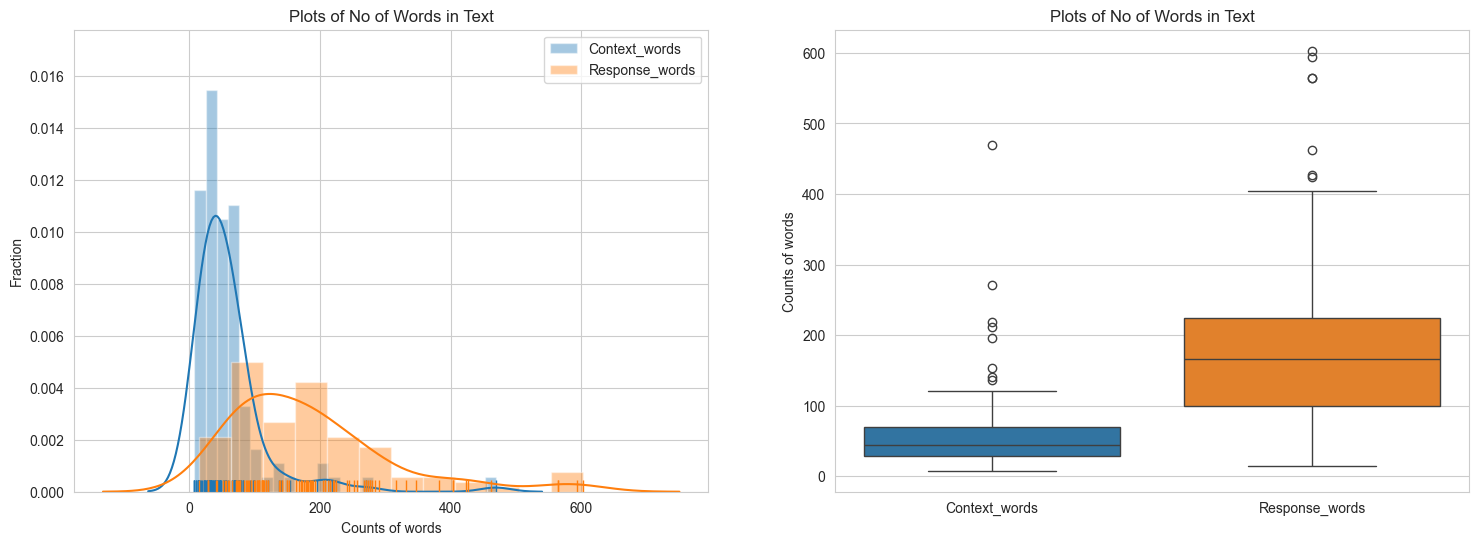

In [38]:
test_df['Context_words'] = test_df['Context'].astype('str').apply(lambda x: len(x.strip().split()))
test_df['Response_words'] = test_df['Response'].astype('str').apply(lambda x: len(x.strip().split()))

basic_statistics(['Context_words', 'Response_words'])
plot_func(['Context_words', 'Response_words'], 'Counts of words', 'Fraction', 'Plots of No of Words in Text')

Context:
1. No of words in context starts from 8 to 469.
2. Most text has less than 268 words. That is 99% percentile of rows has 268 or fewer words.

Response:
1. In response No of words start from 15 to 603.
2. Most of the response has less than 592 words.

# Split the Evaluation Data

In [39]:
# Load the CSV file
df = pd.read_csv('test_data.csv')

# Number of samples per split file
num_samples_per_split = 5

# Total number of splits needed
num_splits = len(df) // num_samples_per_split + int(len(df) % num_samples_per_split != 0)

for i in range(num_splits):
    # Calculate the start and end indices for the current split
    start_idx = i * num_samples_per_split
    end_idx = min((i + 1) * num_samples_per_split, len(df))

    # Extract the subset of the dataframe for the current split
    df_subset = df.iloc[start_idx:end_idx]

    # Save the subset to a new CSV file
    output_filename = f'test_split_data/test_split_data_{i + 1}.csv'
    df_subset.to_csv(output_filename, index=False)

    print(f'Saved {output_filename} with {len(df_subset)} rows')

Saved test_split_data/test_split_data_1.csv with 5 rows
Saved test_split_data/test_split_data_2.csv with 5 rows
Saved test_split_data/test_split_data_3.csv with 5 rows
Saved test_split_data/test_split_data_4.csv with 5 rows
Saved test_split_data/test_split_data_5.csv with 5 rows
Saved test_split_data/test_split_data_6.csv with 5 rows
Saved test_split_data/test_split_data_7.csv with 5 rows
Saved test_split_data/test_split_data_8.csv with 5 rows
Saved test_split_data/test_split_data_9.csv with 5 rows
Saved test_split_data/test_split_data_10.csv with 5 rows
Saved test_split_data/test_split_data_11.csv with 5 rows
Saved test_split_data/test_split_data_12.csv with 5 rows
Saved test_split_data/test_split_data_13.csv with 5 rows
Saved test_split_data/test_split_data_14.csv with 5 rows
Saved test_split_data/test_split_data_15.csv with 5 rows
Saved test_split_data/test_split_data_16.csv with 5 rows
Saved test_split_data/test_split_data_17.csv with 5 rows
Saved test_split_data/test_split_data_18